In [43]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE #Feature ranking with recursive feature elimination.
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


import plotly.express as px

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
PROJECT_ROOT_DIR = "/Users/daniel421/Desktop/STAT_724/ds_724/Final_Project"
# CHAPTER_ID = "Lin_regression"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

#### Column indices to potentially drop: 4,5,6 and -1

In [3]:
import os
#UP_DIR = '/Users/daniel421/Desktop/STAT_724/ISLR_data'
csv_file = os.path.join(PROJECT_ROOT_DIR,'listings_6.csv')
abnb = pd.read_csv(csv_file, low_memory=False)
abnb = pd.DataFrame(data = abnb)
abnb = abnb.drop(abnb.columns[[4,5,6,-1]], axis = 1)

In [4]:
len(abnb)

15991

Sklearn SimpleImputer

In [5]:
abnb.fillna(abnb.mean(), inplace=True)

In [6]:
# s_imputer = SimpleImputer(missing_values= np.nan, strategy = 'mean', verbose=0)
# s_imputer = s_imputer.fit(abnb[1:,1:])
# abnb = s_imputer.transform(abnb)

In [7]:
abnb = pd.DataFrame(data = abnb)
print(abnb.columns)

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_is_superhost2', '

In [8]:
# abnb.dtypes

In [9]:
# abnb['host_response_rate'] = abnb['host_response_rate'].astype(float, errors = 'raise')
# abnb['host_response_rate'] = pd.to_numeric(abnb['host_response_rate'], errors='coerce')
# abnb['host_response_rate'] = (abnb['host_response_rate'].str.strip('%').astype(float))
# abnb['host_response_rate'] = abnb['host_response_rate']/100
# abnb['host_acceptance_rate'] = (abnb['host_acceptance_rate'].str.strip('%').astype(float))
# abnb['host_acceptance_rate'] = abnb['host_acceptance_rate']/100


## Need to scale the dataframe?

#### Column indices to potentially drop: 4,5,6 and -1

In [10]:
# rescaling the variables (both)
abnb_columns = abnb.columns
scaler = MinMaxScaler()
abnb = scaler.fit_transform(abnb)

# rename columns (since now its an np array)
abnb = pd.DataFrame(abnb)
abnb.columns = abnb_columns

abnb.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost2,host_identity_verified2,has_availability2,instant_bookable2,dmy_Hotel room,dmy_Private room,dmy_Shared room
0,0.35,0.18,0.002549,0.002549,0.0625,0.047935,0.000000,0.015002,0.029029,0.562281,...,0.000000,0.0,0.002353,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.21,0.76,0.000319,0.000319,0.1875,0.000000,0.117647,0.007301,0.000000,0.364682,...,0.000000,0.0,0.036032,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.00,1.00,0.000319,0.000319,0.1250,0.000000,0.000000,0.006001,0.029029,0.364682,...,0.006079,0.0,0.003824,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.00,0.25,0.000319,0.000319,0.2500,0.125000,0.058824,0.027503,0.004004,0.562281,...,0.000000,0.0,0.000074,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1.00,1.00,0.000319,0.000319,0.1250,0.000000,0.000000,0.006801,0.001001,0.006503,...,0.003040,0.0,0.027134,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Split into train and test

creating y_train and y_test, X_train, X_test

In [11]:
abnb_train, abnb_test = train_test_split(abnb, train_size = 0.7, test_size = 0.3, random_state = 10)

y_train = abnb_train['price']
y_test = abnb_test['price']

X_train = abnb_train.drop('price', axis = 1)
X_test = abnb_test.drop('price', axis = 1)

In [12]:
# print(len(X_test))
# print(len(y_test))

In [13]:
print(len(X_train))
print(len(y_train))

11193
11193


In [14]:
isinstance(abnb_train, pd.DataFrame)

True

## Building a model without cross-validation

In [15]:
print(len(X_train.columns))
print(X_train.shape, y_train.shape)

41
(11193, 41) (11193,)


In [16]:
# first model with an arbitrary choice of n_features
# running RFE with number of features = 20

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [18]:
print(rfe)

RFE(estimator=LinearRegression(), n_features_to_select=20)


In [20]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('host_response_rate', False, 12),
 ('host_acceptance_rate', False, 20),
 ('host_listings_count', True, 1),
 ('host_total_listings_count', True, 1),
 ('accommodates', True, 1),
 ('bedrooms', True, 1),
 ('beds', True, 1),
 ('minimum_nights', True, 1),
 ('maximum_nights', False, 14),
 ('minimum_minimum_nights', False, 10),
 ('maximum_minimum_nights', True, 1),
 ('minimum_maximum_nights', True, 1),
 ('maximum_maximum_nights', True, 1),
 ('minimum_nights_avg_ntm', True, 1),
 ('maximum_nights_avg_ntm', True, 1),
 ('availability_30', False, 6),
 ('availability_60', False, 19),
 ('availability_90', False, 18),
 ('availability_365', False, 13),
 ('number_of_reviews', True, 1),
 ('number_of_reviews_ltm', True, 1),
 ('number_of_reviews_l30d', True, 1),
 ('review_scores_rating', False, 5),
 ('review_scores_accuracy', False, 17),
 ('review_scores_cleanliness', False, 3),
 ('review_scores_checkin', False, 4),
 ('review_scores_communication', False, 16),
 ('review_scores_location', True, 1),
 ('rev

predict price of X_test

In [24]:
from sklearn.metrics import r2_score

The r2_score fucntion computes the coefficient of determination, usually denoted as R². It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

In [26]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)

0.28228895316734615


This low value tells us that there is little correlation 

Perhaps we increase the numbers of features to select

In [30]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=25)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.2919812747325097


We see that there is not much of an icrease

## Begin by implementing K-fold cross validation

In [35]:
#k-fold CV (using all the numerical variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print(scores)

[0.07979227 0.25628204 0.2780594  0.28280741 0.27340943 0.34995477
 0.32158162 0.24537464 0.35150109 0.16234735]


Another way of implementing the code above:

In [38]:
# create a KFold object with 10 splits, the random state parameter is used 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
print(scores)  

[0.25874207 0.30562517 0.06538084 0.2582094  0.27258172 0.30408126
 0.32383632 0.33217462 0.20217354 0.21158081]


Let's get the mean squared error values

In [40]:
scores = cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
print(scores)

[-0.00112609 -0.0003559  -0.00023785 -0.00020066 -0.00015633 -0.00021891
 -0.00014979 -0.00034969 -0.00021351 -0.00050451]


## Grid Search CV

In [41]:
len(X_train.columns)

41

In [45]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 42))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 10 folds for each of 41 candidates, totalling 410 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

Lets put these into a dataframe, to plot these results

In [46]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.171937      0.005222         0.002134        0.000182   
1        0.169807      0.003070         0.002084        0.000156   
2        0.164095      0.001813         0.002147        0.000300   
3        0.164523      0.002901         0.002376        0.000158   
4        0.159124      0.001928         0.002185        0.000141   
5        0.156920      0.002241         0.002156        0.000176   
6        0.158637      0.003048         0.002245        0.000275   
7        0.156459      0.003246         0.002127        0.000223   
8        0.156286      0.002958         0.002266        0.000132   
9        0.152641      0.001332         0.002166        0.000145   
10       0.148670      0.001611         0.002380        0.000249   
11       0.149589      0.002843         0.002123        0.000132   
12       0.150336      0.016202         0.002422        0.000302   
13       0.144247      0.002149         0.002336

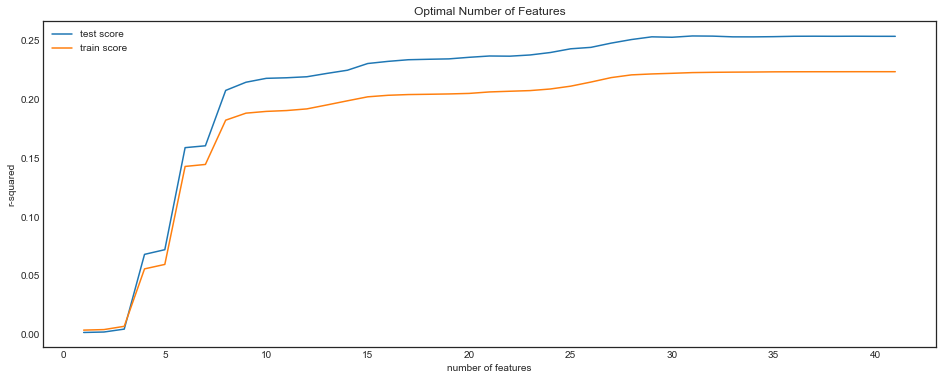

In [47]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

We see that after 26, there is a stablization in the r-squared.

In [48]:
# final model
n_features_optimal = 26

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.298596279259179
